In [ ]:
! pip install numpy opencv-python

In [ ]:
! pip install dlib

In [ ]:
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 29 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=91167a0b9a3df0b21b7cbf4eae9de6155ce8a48896691b7399b91141fca60b44
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import cv2
import numpy as np
import os

In [ ]:
path='./train/'
labels=[]
encodings=[]
images=os.listdir(path)

In [ ]:
images

['joey.jpg',
 'monica.jpg',
 'phoebe.jpg',
 'rachel.jpg',
 'ross.jpg',
 'chandler.jpg',
 'adel.jpg']

In [ ]:
for x in images:
  image=fr.load_image_file(path+x)

  face_encoding=fr.face_encodings(image)[0]
  print(face_encoding.shape)
  encodings.append(face_encoding)
  name=os.path.splitext(os.path.basename(path+x).capitalize())
  labels.append(name[0])
  print(name[0])





(128,)
Joey
(128,)
Monica
(128,)
Phoebe
(128,)
Rachel
(128,)
Ross
(128,)
Chandler
(128,)
Adel


In [ ]:
test_image="/content/test.jpg"
image=cv2.imread(test_image)

In [ ]:
locations=fr.face_locations(image,model='cnn')

In [ ]:
print(locations)

[(137, 665, 235, 567), (375, 725, 493, 607), (351, 259, 469, 141), (57, 545, 155, 447), (208, 415, 325, 297), (339, 856, 457, 739)]


In [ ]:
test_encodings=fr.face_encodings(image,locations,model='cnn')

In [ ]:
len(test_encodings[0])

128

In [ ]:
for  (top,right,bottom,left),face_encodings in zip(locations,test_encodings):
  matches=fr.compare_faces(encodings,face_encoding)
  name=''
  face_distance=fr.face_distance(encodings,face_encodings)
  best_match=np.argmin(face_distance)


  name=labels[best_match]


  cv2.rectangle(image,(left,top),(right,bottom),(0,255,0),1)
  cv2.rectangle(image,(left,bottom+20),(right,bottom),(0,255,0),cv2.FILLED)
  font=cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(image,name,(left+6,bottom+6),font,1.0,(255,255,255),1)


4
2
1
3
5
0


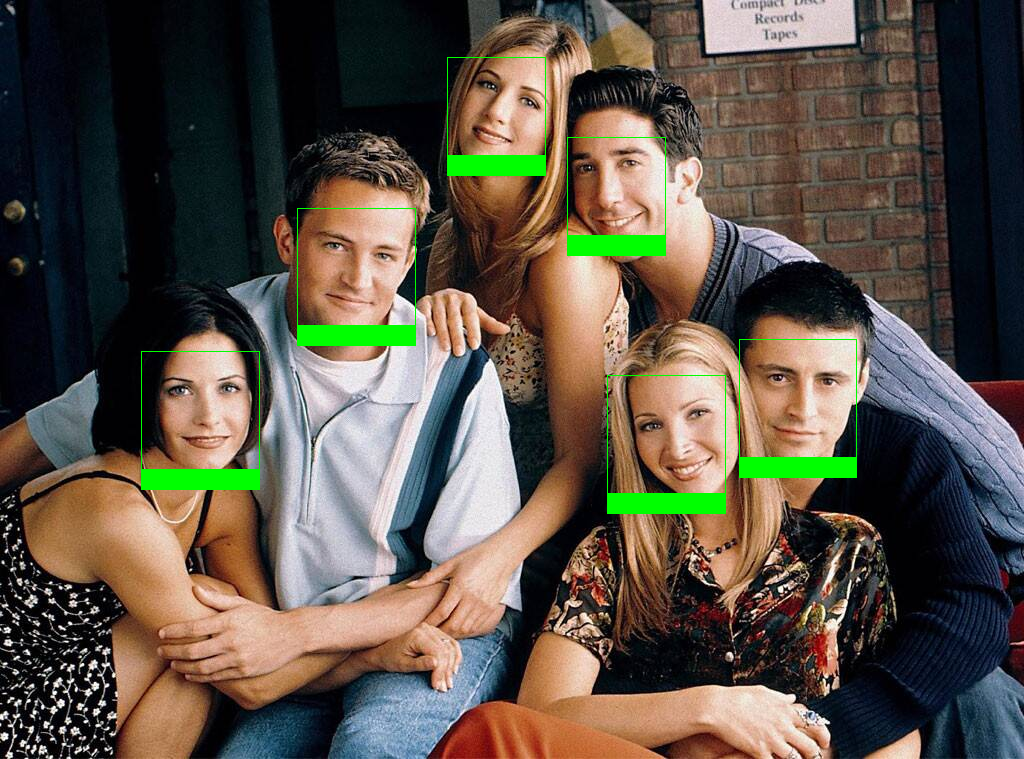

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
#cv2.imshow(image)